#  Team Members:
   1. Judy Koech
   2. Elizabeth Masai
   3. Phinidy George

# 1.0 BUSINESS UNDERSTANDING

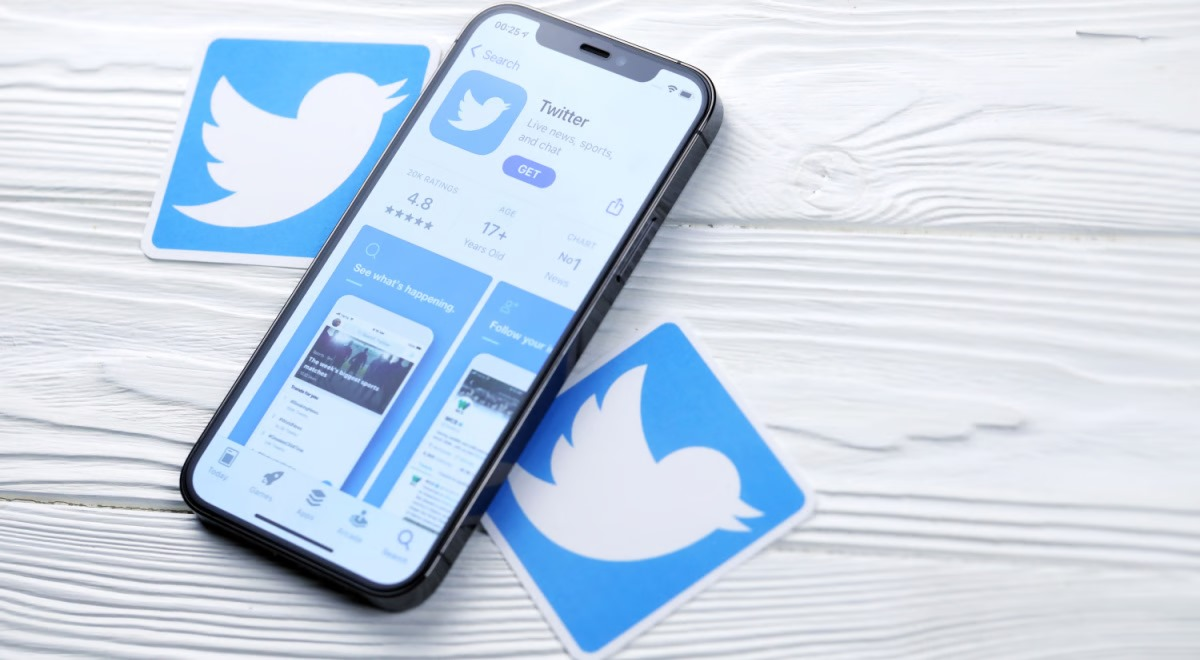

## 1.1. Overview/Background

The landscape of traditional advertising has changed dramatically, with many companies now employing highly targeted strategies. By understanding customer demographics, businesses can communicate more directly and effectively. Social media platforms like Twitter and Facebook offer a direct channel for consumers to share their opinions about brands, products, and services. While this real-time feedback is invaluable, managing the sheer volume of messages can be challenging.

## 1.2. Business Problem

Consumers frequently use social media to share their thoughts, presenting companies with the challenge of extracting actionable insights from the overwhelming amount of data. For example, during SXSW 2011, Apple and Google introduced numerous new products and services, resulting in a flood of tweets. Sifting through thousands of unlabeled tweets to gain meaningful insights is a significant challenge for companies like Apple.

## 1.3.  Project Aim and Scope

The project aims to assist companies such as Apple and Google by developing a predictive classification model that can analyze tweets. This model will categorize the sentiment of tweets as "Positive" or "Not positive" (including neutral or sentiment-lacking tweets). By doing so, companies can better organize and utilize the information embedded in the tweets they receive during events like SXSW or in their regular social media interactions.
## 1.4. Stakeholders

The primary stakeholders in this project are companies like Apple and Google, which will benefit from an enhanced ability to understand consumer sentiment. Secondary stakeholders include marketing teams, product managers, and customer service departments that can leverage these insights for better decision-making and strategy formulation.

## 1.5. Conclusion

This classification model offers numerous benefits, particularly by identifying "Positive" tweets about Apple and Google products:

1. Gauging public opinion
2. Obtaining direct consumer feedback
3. Retraining the model on custom datasets for specific products or regions
4. Understanding target demographics
    - Identifying individuals who show positive interest
    - Tailoring advertising strategies more effectively
    - Facilitating advertising within social media circles of existing fans, enhancing outreach and engagement

The project has the potential to transform how companies interact with and respond to consumer feedback on social media, providing valuable insights and fostering better consumer relationships.


# 2.0 DATA UNDERSTANDING


To build an effective NLP model for analyzing Twitter sentiment about Apple and Google products, we need to thoroughly understand the dataset and its properties. The dataset in question comes from CrowdFlower via data.world and contains over 9,000 tweets that have been rated by human raters as positive, negative, or neither. Below is a detailed breakdown of the data understanding process:


## 2.1 Dataset Overview

The dataset consists of 9,093 tweets related to technology products and brands, with a focus on Apple and Google products. The data was collected during and after the 2011 South by Southwest (SXSW) Conference. Each tweet has been pre-labeled by human raters for sentiment analysis and product and brand identification.


## 2.2 Source of Data and Suitability

**Source**

The dataset used in this project originates from CrowdFlower, now known as Figure Eight, and was subsequently made available on
[data.world](https://data.world/crowdflower/brands-and-product-emotions) .Kent Cavender-Bares contributed this valuable resource on August 30, 2013, sharing it with the data science community.

The data is contained in a CSV file named "judge-1377884607_tweet_product_company.csv", which serves as the primary source for our analysis. This file contains a wealth of information about consumer sentiments towards technology products, particularly focusing on tweets related to Apple and Google during the 2011 South by Southwest (SXSW) Conference.

**Suitability**

- The dataset is highly relevant for the project as it specifically contains tweets about Apple and Google products, aligning perfectly with the project's aim.
- The manual sentiment ratings (positive, negative, or neither) provide a robust foundation for training a sentiment analysis model.
- Raters judged if the tweet's text expressed a positive, negative, or no emotion towards a brand . When an emotion was expressed, the rater identified the brand  that was the target of that emotion.








## 2.3 Data Size and  Structures

**Data Size**

 The dataset comprises over 9,000 tweets, which is a substantial amount for training an NLP model. This size is generally sufficient to capture a wide range of sentiment expressions and variations in language.


**Data Structures**

The resulting data file contains three columns per row:

a) tweet_text: The actual content of the tweet

b) emotion_in_tweet_is_directed_at: The product or brand the emotion is directed at (if identifiable)

c) is_there_an_emotion_directed_at_a_brand_or_product: The sentiment of the tweet (Positive, Negative, or No emotion)

## 2.4. Feature Inclusion and Relevance

### Features:
- **Tweet Text:** The primary feature for sentiment analysis. The content of the tweet will be tokenized and transformed into numerical representations (e.g., TF-IDF, word embeddings) for model training.
- **Emotion Expressed:** The target variable for the model, indicating whether the sentiment is positive, negative, or neither.
- **Target Product/Brand:** This feature can provide additional context and help in understanding the sentiment in relation to specific products or brands.

### Justification:
- The tweet text is directly relevant as it contains the information needed to determine sentiment.
- The emotion expressed is essential for supervised learning, providing the ground truth for model training and evaluation.
- The target product/brand feature can help in fine-tuning the model to understand sentiment in the context of specific products or brands, which is particularly useful for companies like Apple and Google.

## 2.5. Data Limitations

### Limitations:
- **Class Imbalance:** The dataset has a significant imbalance in sentiment classes (e.g.,  There was overwhelmingly neutral with very few examples of negative sentiment.), this could affect model performance. Techniques such as resampling or class weighting may be necessary.
- **Noise and Ambiguity:** Tweets often contain slang, abbreviations, and emojis, which can introduce noise and ambiguity. Preprocessing steps like text normalization and the use of advanced NLP techniques can help mitigate this.
- **Contextual Understanding:** Tweets are short and may lack context, making it challenging to accurately determine sentiment. Incorporating additional context or using models capable of understanding nuanced language (e.g., transformers) can improve performance.

By thoroughly understanding the dataset and addressing its limitations, we can build a robust NLP model to analyze Twitter sentiment about Apple and Google products. This model will help companies like Apple and Google gain valuable insights from social media feedback, enhancing their ability to respond to consumer sentiment effectively.



# 3.0 DATA EXPLORATION

Before diving into model building, let's get acquainted with our training data. By exploring its characteristics, we can uncover valuable insights. This exploration will focus on key aspects like data types, missing values (null values), the frequency of different values (value counts), and the spread of classes (for classification tasks).

## 3.1. Data Types

Understanding the data types of each feature is crucial for preprocessing and model building. We'll check the data types of all columns in the dataset to ensure they are appropriate for the tasks ahead.

## 3.2. Missing Values (Null Values)

Missing values can significantly impact model performance. We'll identify columns with missing values and determine the best strategies to handle them, such as imputation or removal.

## 3. 3. Value Counts

Analyzing the frequency of different values in categorical columns can provide insights into the distribution of the data. We'll perform value counts for key columns to understand their distributions better.

## 3. 4. Spread of Classes

For classification tasks, it's essential to understand the distribution of the target variable. We'll examine the spread of sentiment classes (positive, negative, neither) to check for class imbalances and plan appropriate strategies if needed.

In [25]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 187.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 187.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 273.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 374.1 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 310.3 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 625.1 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 625.1 kB/s eta 0:00:01
   ----------

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
from wordcloud import WordCloud
from PIL import Image
np.random.seed(42)


#Import nltk Packages
# Importing nltk Packages
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.tokenize import word_tokenize, TweetTokenizer


#Importing sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Importing tensorflow and keras Packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
tf.random.set_seed(42)

#from  scikeras.wrappers import KerasClassifier

# Importing os modules
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
#Loading the dataset
df=pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='ISO-8859-1')

In [4]:
#checking out columns
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product



The present dataset contains three columns: "tweet_text" (string) with the raw tweet content, "emotion_in_tweet_is_directed_at" (string) identifying the target product or brand, and "is_there_an_emotion_directed_at_a_brand_or_product" (categorical string) classifying the sentiment as positive, negative, or no emotion. These data types together provide a structure for analyzing tweet content, identifying specific products mentioned, and categorizing the associated sentiment.

In [5]:
#View tweet text by column
df["tweet_text"]


0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9093, dtype: object

##  Data Preparation

This process will include thorough cleaning of the tweet text by removing special characters, standardizing product names, and handling any missing or inconsistent values. We will also focus on preprocessing the text data through tokenization, removing stop words, and potentially applying stemming or lemmatization techniques. Finally, we'll encode the sentiment categories and balance the dataset if necessary, ensuring our model has a solid foundation for learning the patterns in consumer sentiment towards tech products.

In [9]:
#Renaming the columns
df = df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'Brand/Product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

df.head()

,tweet,Brand/Product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


To make the columns more readable  and clearly convey the purpose of each column,we have renamed the columns to the above.

In [18]:
#Expand the Tweet contents and rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [10]:
df.head()

,tweet,Brand/Product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Now that the DataFrame has clearer column names, let's explore the data to see what preprocessing is needed before building our model. This involves checking data types, finding missing or duplicate values, and ensuring balanced classes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   sentiment      9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The DataFrame consists of three columns with a total of 9093 entries. The datatypes of all columns are objects (strings). The column-specific observations are:

- **Tweet:** Contains 9092 non-null entries, indicating there is 1 missing value.
- **Brand/Product:** Contains 3291 non-null entries, indicating a significant number of missing values (5802). These missing data points will be filled in with an 'Uncategorized' label since they are not detrimental to the current study.
- **Sentiment:** Contains 9093 non-null entries, with no missing values.

In [11]:
#Checking for possible duplicates and column unique value counts
df.describe()

,tweet,Brand/Product,sentiment
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


- **Tweet:**
  - Count: 9092 (slightly less than the total entries, indicating some missing values).
  - Unique: 9065 (It looks like there may be a number of tweets that are duplicate entries, as there are fewer unique tweets than total tweets).

- **Brand/Product:**
  - Unique: 9 (suggesting only a few distinct brands or products are mentioned).

- **Sentiment:**
  - Unique: 4 (indicating there are four different sentiment categories).


In [12]:
#Checking for duplicates
print('The number of Duplicate entries are:', df.duplicated().sum())

#Displaying duplicates for inspection
df[df['tweet'].isin(
    df['tweet'][df['tweet'].duplicated()\
                        ])].sort_values("tweet")

The number of Duplicate entries are: 22


,tweet,Brand/Product,sentiment
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
466,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
774,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
8483,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion


In [13]:
#Checking for Missing Data
df.isna().sum()

tweet               1
Brand/Product    5802
sentiment           0
dtype: int64

In [14]:
#Checking for null values in the Brand column
df_NaN_pos = df [(df['Brand/Product'].isnull()) & (df['sentiment'] == 'Positive emotion')]


In [24]:
df_NaN_pos.head(50)

,tweet,Brand/Product,sentiment
46,Hand-Held Û÷HoboÛª: Drafthouse launches Û÷H...,NaN,Positive emotion
112,Spark for #android is up for a #teamandroid aw...,NaN,Positive emotion
131,Does your #SmallBiz need reviews to play on Go...,NaN,Positive emotion
157,@mention #SXSW LonelyPlanet Austin guide for ...,NaN,Positive emotion
337,First day at sxsw. Fun final presentation on ...,NaN,Positive emotion
386,&quot;You can Google Canadian Tuxedo and lose ...,NaN,Positive emotion
440,Lovin the digital! @mention band sings into iP...,NaN,Positive emotion
500,Do it! RT Find the hottest spots @mention w/ @...,NaN,Positive emotion
555,I have my golden tickets f 4sq party Day after...,NaN,Positive emotion
559,GSD&amp;M Google #sxsw party with @mention is ...,NaN,Positive emotion


After inspection, the 22 duplicate tweets be removed so that the dataset lacks any sets of duplicates, removing Null Tweets,  and File in missing Item Values

In [29]:
#Removing 1 null 'Tweet' Entry
df.dropna(subset=['tweet'], inplace=True)
#Removing Duplicates
df.drop_duplicates(inplace=True)
#Filling in Null "Item" categories with "Uncategorised"
df = df.assign(**{'Brand/Product': df['Brand/Product'].fillna('Uncategorised')})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9070 non-null   object
 1   Brand/Product  9070 non-null   object
 2   sentiment      9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB


In [26]:
# fill the rest with Uncategorized
df['Brand/Product'] = df['Brand/Product'].fillna('Uncategorized')

In [27]:
df.isnull().sum()

tweet            0
Brand/Product    0
sentiment        0
dtype: int64

The dataset has been successfully cleaned, resulting in a DataFrame with 9,070 entries across 3 columns: tweet, Brand, and sentiment. All columns now contain 9,070 non-null values, indicating that there are no missing data points in any column. This cleaned dataset, free from duplicates and null values, provides a solid foundation for further analysis of tweets, brands, and associated sentiments.

# Analyzing Key Features 

## Brand Data


The `extract_brand` function is included to improve the accuracy and consistency of brand identification in the dataset. By leveraging both the Brand/Product and Tweet text fields, the function helps in reducing the number of "Uncategorized" entries and provides a clearer picture of the brand distribution, facilitating better analysis and decision-making.

In [30]:
#checking for categories in the brand column
df['Brand/Product'].value_counts()

Brand/Product
Uncategorized                      5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [31]:
def extract_brand(item, tweet):
    # Convert item and tweet to lowercase for case-insensitive comparison
    item_lower = item.lower()
    tweet_lower = tweet.lower()
    
    # Define brand keywords
    google_keywords = ['android', 'google']
    apple_keywords = ['apple', 'ip']
    
    # Check for Google keywords in the item
    if any(keyword in item_lower for keyword in google_keywords):
        return 'Google'
    
    # Check for Apple keywords in the item
    if any(keyword in item_lower for keyword in apple_keywords):
        return 'Apple'
    
    # If brand is still unknown, check the tweet text
    is_google = any(keyword in tweet_lower for keyword in google_keywords)
    is_apple = any(keyword in tweet_lower for keyword in apple_keywords)
    
    # Determine the brand based on the tweet text
    if is_google and is_apple:
        return 'Contains Both'
    elif is_google:
        return 'Google'
    elif is_apple:
        return 'Apple'
    
    # Default to 'Unknown' if no keywords are found
    return 'Uncategorized'

In [33]:
# Apply the 'extract_brand' function to each row of the DataFrame
df['Brand'] = df.apply(lambda x: extract_brand(x['Brand/Product'], x['tweet']), axis=1)

# Count the occurrences of each unique value in the 'Brand' column
brand_counts = df['Brand'].value_counts()

# Print the counts of each brand
print(brand_counts)

Brand
Apple            5361
Google           2757
Uncategorized     739
Contains Both     213
Name: count, dtype: int64


Our extract_brand function effectively categorized most tweets with their corresponding brands. Since our data includes hashtags, we'll add new columns: one for hashtags, another for word count, and a final one replicating the original tweet text for future modeling purposes.

In [35]:
# Extracting hashtags and creating a column for them
df['Hashtags'] = df['tweet'].apply(lambda tweet: re.findall(r'#\w+', tweet))

# Creating a tweet word length column
df['tweet_Word_Count'] = df['tweet'].apply(lambda tweet: len(tweet.split()))

# This will be the tweet text that is preprocessed
df['Processed_tweet'] = df['tweet'].copy()

# Display the DataFrame
df.head()

,tweet,Brand/Product,sentiment,Brand,Hashtags,tweet_Word_Count,Processed_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,"[#RISE_Austin, #SXSW]",23,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,[#SXSW],22,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,"[#iPad, #SXSW]",15,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,[#sxsw],15,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,[#SXSW],17,@sxtxstate great stuff on Fri #SXSW: Marissa M...




## Tweet Sentiment Data

We will streamline our sentiment analysis by creating a binary classification system. This involves examining the current sentiment labels and introducing a new column with simplified categories: "Positive" for positive sentiments and "Not Positive" for all others. This transformation from multi-class to binary sentiments will sharpen our classification model's focus, enabling it to more effectively distinguish positive tweets from the rest. By reducing complexity, we aim to enhance the model's accuracy and make results more easily interpretable.







In [36]:
#checking the sentiment column
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [37]:
df.head()

,tweet,Brand/Product,sentiment,Brand,Hashtags,tweet_Word_Count,Processed_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,"[#RISE_Austin, #SXSW]",23,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,[#SXSW],22,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,"[#iPad, #SXSW]",15,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,[#sxsw],15,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,[#SXSW],17,@sxtxstate great stuff on Fri #SXSW: Marissa M...


Our sentiment analysis reveals a significant imbalance in the dataset. "No emotion toward brand or product" dominates with 5,375 entries, followed by "Positive emotion" (2,970), "Negative emotion" (569), and "I can't tell" (156). To align with our project goal of identifying positive tweets and address this imbalance, we'll reorganize the sentiments into a binary classification: "Positive" (containing only "Positive emotion" tweets) and "Not Positive" (including "Negative emotion" and "No emotion toward brand or product" tweets). We'll remove the 156 "I can't tell" entries as they're less useful for our classification model. This simplification will help focus our model on distinguishing positive tweets from others, potentially improving accuracy and interpretability

In [38]:
#processing and reclassifying sentiment data in a DataFrame
class SentimentProcessor:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def process_sentiments(self):
        self._drop_uncertain_sentiments()
        self._copy_raw_sentiment()
        self._replace_sentiments()
    
    def _drop_uncertain_sentiments(self):
        self.dataframe.drop(self.dataframe[self.dataframe['sentiment'] == "I can't tell"].index, inplace=True)
    #Creating copy of original sentiment to preserve for possible later use
    def _copy_raw_sentiment(self):
        self.dataframe['Original_Sentiment'] = self.dataframe['sentiment']
    
    def _replace_sentiments(self):
        senti_replace = {
            'No emotion toward brand or product': 'Not Positive',
            'Positive emotion': 'Positive',
            'Negative emotion': 'Not Positive',
        }
        self.dataframe.replace({'sentiment': senti_replace}, inplace=True)

# Create an instance of SentimentProcessor
processor = SentimentProcessor(df)

# Process the sentiments
processor.process_sentiments()

# Display the resulting DataFrame
print(df['sentiment'].value_counts())
df.head()

sentiment
Not Positive    5944
Positive        2970
Name: count, dtype: int64


,tweet,Brand/Product,sentiment,Brand,Hashtags,tweet_Word_Count,Processed_tweet,Original_Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Not Positive,Apple,"[#RISE_Austin, #SXSW]",23,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,[#SXSW],22,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,"[#iPad, #SXSW]",15,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Not Positive,Apple,[#sxsw],15,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,[#SXSW],17,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


The sentiment reclassification has successfully condensed our data into two distinct categories: "Positive" and "Not Positive", with 2,970 and 5,944 entries respectively. While this binary classification brings us closer to our modeling goal, a significant class imbalance persists with a 1:2 ratio of positive to not positive sentiments. To develop a robust sentiment classification model, we'll need to address this imbalance through techniques such as oversampling, undersampling, applying class weights, or using specialized evaluation metrics for imbalanced data.

# Preparing Tweets for Modelling


We'll now focus on cleaning the tweet text. This process involves removing unnecessary characters like punctuation, URLs, and hashtags. Additionally, we'll convert all text to lowercase and eliminate common stop words. Following this cleaning step, we'll tokenize the text, splitting it into individual words. Finally, we'll lemmatize these tokens, reducing them to their base forms. This will result in a list of meaningful words (lemmas) for each tweet, ready for further analysis.

In [64]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def clean_and_lemmatize_tweet(tweet, stop_words):
    # Removing URLs, hashtags, and Twitter usernames from Tweets
    tweet = re.sub(r'http\S+', '', str(tweet))
    tweet = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', str(tweet))  # Removing URLs with www
    tweet = re.sub(r'{link}', '', str(tweet))  # Removing {link} from tweets
    tweet = re.sub(r'#\S+', '', str(tweet))
    tweet = re.sub(r'@[A-Za-z0-9]+', '', str(tweet))

    # Removing punctuation and making lowercase
    for i in string.punctuation:
        tweet = tweet.replace(i, '').lower()

    # Tokenizing tweets
    tokens = nltk.word_tokenize(tweet)

    tweet_tokens = []

    # Instantiating the Lemmatizer 
    lemmatizer = WordNetLemmatizer()

    # Removing stop words and lemmatizing tweets
    for token in tokens:
        if token.lower() not in stop_words:
            tweet_tokens.append(lemmatizer.lemmatize(token))
            
    return tweet_tokens


To ensure our analysis captures the emotional tone of tweets effectively, we'll customize the stop word list from NLTK. This involves removing generic words that might hold emotional significance in our context. Additionally, we'll remove punctuation to match the format of the cleaned tweets and prepare them for the clean_and_lemmatize_tweet function.

In [59]:
# Examine the NLTK English stopwords list
nltk_stop_words = stopwords.words('english')
nltk_stop_words.sort()
print("NLTK Stop Words:", nltk_stop_words)

NLTK Stop Words: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn'

In [60]:
# Define a custom list of stopwords
custom_stop_words = [
    'a', 'about', 'after', 'ain', 'all',
    'am', 'an', 'and', 'any', 'as', 'at',
    'be', 'been', 'before', 'being', 'but',
    'by', 'd', 'do', 'does', 'doing',
    'don', 'down', 'during', 'each', 'few',
    'for', 'from', 'further', 'he', 'her',
    'here', 'hers', 'herself', 'him', 'himself',
    'his', 'how', 'i', 'if', 'in', 'into',
    "it's", 'its', 'itself', 'just', 'll', 'm',
    'ma', 'me', 'my', 'myself', 'o', 'of', 'off',
    'on', 'once', 'only', 'or', 'other',
    'our', 'ours', 'ourselves', 'out', 'over',
    'own', 're', 's', 'same', "she's", 'so',
    'some', 'such', 't', 'than', 'that',
    "that'll", 'the', 'their', 'theirs',
    'them', 'themselves', 'then', 'there',
    'these', 'they', 'this', 'those', 'through',
    'to', 'too', 'under', 'until', 'up', 've',
    'we', 'what', 'when', 'where', 'which', 'while',
    'who', 'whom', 'why', 'will', 'with', 'won',
    'y', 'you', "you'd", "you'll", "you're",
    "you've", 'your', 'yours', 'yourself', 'yourselves'
]

# Remove punctuation from the custom stop words list
cleaned_stop_words = [''.join(char for char in word if char not in string.punctuation) for word in custom_stop_words]

# Display the last few elements of both lists for comparison
print("Original Custom Stop Words (last 6):", custom_stop_words[-6:])
print("Cleaned Custom Stop Words (last 6):", cleaned_stop_words[-6:])

Original Custom Stop Words (last 6): ["you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
Cleaned Custom Stop Words (last 6): ['youre', 'youve', 'your', 'yours', 'yourself', 'yourselves']


In [66]:
# Apply the tweet cleaning and lemmatizing function
df['Processed_tweet'] = df['Processed_tweet'].apply(lambda x: clean_and_lemmatize_tweet(x, cleaned_stop_words))
for index in [0, 1, 2]:  # Adjust indices as needed
    print(f"Original tweet {index}: {df['tweet'][index]}")
    print(f"Processed tweet {index}: {df['Processed_tweet'][index]}")
    print('---------------------------------')

Original tweet 0: .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
Processed tweet 0: ['have', '3g', 'iphone', '3', 'hr', 'tweeting', 'it', 'wa', 'dead', 'need', 'upgrade', 'plugin', 'station']
---------------------------------
Original tweet 1: @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
Processed tweet 1: ['know', 'awesome', 'ipadiphone', 'app', 'likely', 'appreciate', 'design', 'also', 'theyre', 'giving', 'free', 't']
---------------------------------
Original tweet 2: @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.
Processed tweet 2: ['can', 'not', 'wait', '2', 'also', 'should', 'sale']
---------------------------------


In [68]:
#Creating Token Count Column
df['Token Count'] = df['Processed_tweet'].str.len()
df.head()

,tweet,Brand/Product,sentiment,Brand,Hashtags,tweet_Word_Count,Processed_tweet,Original_Sentiment,Token Count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Not Positive,Apple,"[#RISE_Austin, #SXSW]",23,"[have, 3g, iphone, 3, hr, tweeting, it, wa, de...",Negative emotion,13
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,[#SXSW],22,"[know, awesome, ipadiphone, app, likely, appre...",Positive emotion,12
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,"[#iPad, #SXSW]",15,"[can, not, wait, 2, also, should, sale]",Positive emotion,7
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Not Positive,Apple,[#sxsw],15,"[hope, year, festival, isnt, crashy, year, iph...",Negative emotion,8
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,[#SXSW],17,"[great, stuff, fri, marissa, mayer, google, ti...",Positive emotion,14
